# Sales Analysis 

We start by cleaning our data. Tasks during this section include:
- Drop NaN values from DataFrame
- Removing rows based on a condition
- Change the type of columns (to_numeric, to_datetime, astype)

Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

To answer these questions we walk through many different pandas & matplotlib methods. They include:
- Concatenating multiple csvs together to create a new DataFrame (pd.concat)
- Adding columns
- Parsing cells as strings to make new columns (.str)
- Using the .apply() method
- Using groupby to perform aggregate analysis
- Plotting bar charts and lines graphs to visualize our results
- Labeling our graphs

#### Importing important Libraries

In [1]:
import pandas as pd 
import pandas as pd 
import matplotlib.pyplot as plt 
import os

import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

Since we have the data of 12 months of sales data in 12 different files.
So our first task will be to merge the 12 months data into a single file.
The reason why we are doing this in because we want to do some yearly analysis also so it will be easier to to that together compared to doing for 12 files.

The files appear as below:
- Sales_January_2021
- Sales_February_2021
- Sales_March_2021
- 
- 
- 
- Sales_December_2021


In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2021.csv')
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
files = [file for file in os.listdir('./Sales_Data')] # we will get the 12 months data 

for file in files:
    print (file)

Sales_April_2021.csv
Sales_August_2021.csv
Sales_December_2021.csv
Sales_February_2021.csv
Sales_January_2021.csv
Sales_July_2021.csv
Sales_June_2021.csv
Sales_March_2021.csv
Sales_May_2021.csv
Sales_November_2021.csv
Sales_October_2021.csv
Sales_September_2021.csv


Now we just need to take the above files and concatnate them into a single CSV

In [4]:
# creating a empty dataframe 
all_months_data = pd.DataFrame() 

In [5]:
files = [file for file in os.listdir('./Sales_Data/')]

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)   
    # instead of giving the complete file path we write + file which also gives the file path
    # './Sales_Data/' is the folder and + file is the name of sales data file for month
    
    all_months_data = pd.concat([all_months_data, df])   # adding all months data to the dataframe

In [6]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
#Save all data into a new csv file '12_months_data.csv'
all_months_data.to_csv('12_months_data.csv',index=False)

### Read the updated data frame 


In [8]:
all_data = pd.read_csv('./12_months_data.csv')
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"


Notice that we have the order date but not exactly the month
So let's add the specific column for the month, which will be helpful in our analysis



In [9]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [10]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Data cleaning 

In [12]:
#checking rows with nan values 
nan_values = all_data[all_data.isna().any(axis=1)]
nan_values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Drop nan values 
all_data = all_data.dropna(how='all')   # dropping all nan values in rows in the dataframe 
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/21 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
# Notice the unique values inside Quantity Ordered column 
# we see there is one unique values as Quantity Ordered
all_data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [15]:
# we also notice that there are some records that are missing the values 
# example  Quantity Ordered has some values as "Quantity Ordered" instead of a number 

#all_data [all_data['Quantity Ordered'].str[0:]== 'Quantity Ordered']
#all_data [all_data['Product'].str[0:]== 'Product']

temp_data = all_data [all_data['Order Date'].str[0:]== 'Order Date']
temp_data

# > We don't want the below records 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
# excluding the temp_data from all_data dataframe 
all_data = all_data[all_data['Order Date'].str[0:] != 'Order Date']   # !=  not equal to 

In [17]:
all_data.dtypes 

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Convert Columns to correct types

In [18]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float
all_data.dtypes 

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### What was the best month for sales? How much was earned that month?

In [19]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/21 09:27,"333 8th St, Los Angeles, CA 90001"


 The first thing that we are going to do is to add an additional column to the data 
 
Notice: We have the order date but we don't have the month, so we will add a specific column for the month 

### Add data with additional column   
##### Month column
* Take the first two characters in the order date sting and make that the month column 

In [21]:
all_data['Month'] = all_data['Order Date'].str[0:2]
                    #convert order data to a string and extract the first two elements which in our case
                    # is the month Order Date 04/19/19 08:46	
        
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [22]:
# Since the month column in in the form of a stirng, hence converting the it back to integer 

all_data['Month'] = all_data['Month'].astype('int32')  # converting months data to numeric value


if we go back to our question. we have got the months separated but we require sales as well, but sales column is missing but we have the Quantity Ordered and the Price Each which shall give us the sales amount. Sales = quantity * price

In [23]:
 all_data['Sales'] = all_data['Quantity Ordered']* all_data['Price Each']
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [24]:
top_month_sale=all_data.groupby('Month').sum()
#top_month_sales = pd.DataFrame(top_month_sale)
top_month_sale['Month']=  range(1,13)
#top_month_sale.set_index('Month', inplace=True)
top_month_sale

,Quantity Ordered,Price Each,Sales,Month
Month,,,,
1,10903,1811768.38,1822256.73,1
2,13449,2188884.72,2202022.42,2
3,17005,2791207.83,2807100.38,3
4,20558,3367671.02,3390670.24,4
5,18667,3135125.13,3152606.75,5
6,15253,2562025.61,2577802.26,6
7,16072,2632539.56,2647775.76,7
8,13448,2230345.42,2244467.88,8
9,13109,2084992.09,2097560.13,9


In [25]:
top_month_sale.columns

Index(['Quantity Ordered', 'Price Each', 'Sales', 'Month'], dtype='object')

In [26]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('whitegrid')  # whitegrid  darkgrid

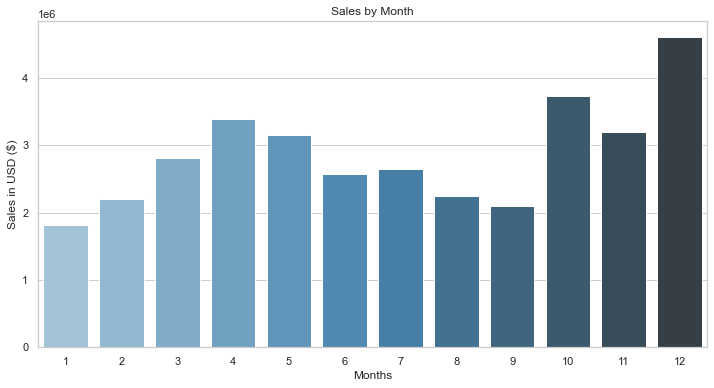

In [27]:

fig_1=sns.barplot(x="Month", y="Sales", data=top_month_sale,
                 palette='Blues_d') # Blues_d # flare
fig_1.set_title('Sales by Month')
fig_1.set_ylabel('Sales in USD ($)')
fig_1.set_xlabel('Months')
plt.show()

#############################################################################

### What city had the highest number of sales 

Notice that the City column is missing but we can find the city in the Purchase Address. 

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/21 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


We are going to split the Purchase Address by comma ","  return the first index and then add that to the City column.


In [29]:
all_data['Purchase Address']

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185950, dtype: object

In [30]:
# lambda x ( every row in pruchase address) : Split every row in Purchase address by comma and return the first index 
#add that to the new column CITY 

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#all_data.head(3)

In [31]:
# Alternate Way

def get_city (address):
    return(address.split(',')[1]) # split the Purchase Address by comma "," return the first index

def get_state(address):
    return(address.split(',')[2]).split(' ')[1] 
# split the Purchase Address by comma "," return the 2 index and split 2 index by whitespace and 
#return second index 

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) +' ('+ get_state (x) + ')')



# Example 
# 917 1st St, Dallas, TX 75001     < Purchase Address
# 917 1st St                       < 0 Index
# Dallas                           < 1 Index
# TX 75001                         < 2 Index

###### Return value at first index which is Dallas

# Return 2 Index > TX 75001  >  split by whitespace 
# TX          < 1 index
# 75001       < 2 Index

###### Return first index which is TX


In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/21 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [33]:
# Be careful with the City and city they kinda look the same 

In [34]:
# RUN THE CODE TO SEE THE ISSUE

#top_city_sales = all_data.groupby('City').sum()   # print the columns as well City won't be in the columns
#top_city_sales['City']= all_data['City'].unique()  # That's why we are adding it as as column
#top_city_sales

# Notice below that when we add the unique city to new column City > The order changes > That won't give 
# us the correct results. TO avoid that we use the below method 

In [35]:

#top_city_sales = all_data.groupby('City').sum()
# Correct Method to get the cities in order 
#top_city_sales['City']= [City for City, df in all_data.groupby('City')]    # adding the new column
# https://www.youtube.com/watch?v=eMOA1pPVUc4
#top_city_sales

In [36]:
# best way to get the desired results > RESET_INDEX
top_city_sales = all_data.groupby('City').sum().reset_index() 
top_city_sales.columns

Index(['City', 'Quantity Ordered', 'Price Each', 'Month', 'Sales'], dtype='object')

In [37]:
top_city_sales

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta (GA),16602,2779908.20,104794,2795498.58
1,Austin (TX),11153,1809873.61,69829,1819581.75
2,Boston (MA),22528,3637409.77,141112,3661642.01
3,Dallas (TX),16730,2752627.82,104620,2767975.40
4,Los Angeles (CA),33289,5421435.23,208325,5452570.80
5,New York City (NY),27932,4635370.83,175741,4664317.43
6,Portland (ME),2750,447189.25,17144,449758.27
7,Portland (OR),11303,1860558.22,70621,1870732.34
8,San Francisco (CA),50239,8211461.74,315520,8262203.91
9,Seattle (WA),16553,2733296.01,104941,2747755.48


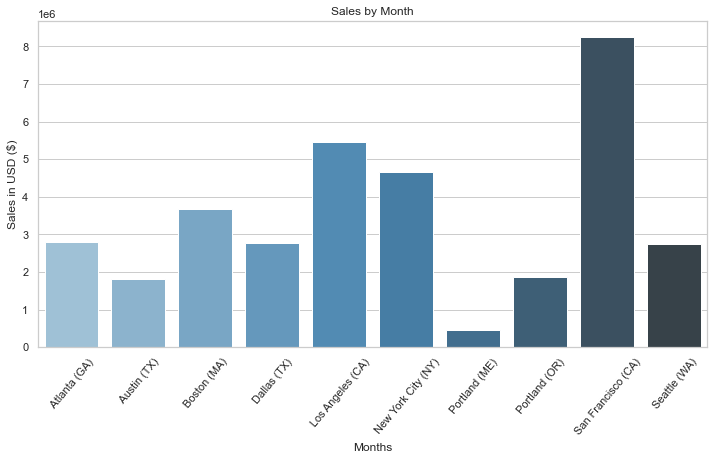

In [38]:
fig_1=sns.barplot(x="City", y="Sales", data=top_city_sales,
                 palette='Blues_d') # Blues_d # flare
fig_1.set_title('Sales by Month')
fig_1.set_ylabel('Sales in USD ($)')
fig_1.set_xlabel('Months')
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=50)
plt.show()

### What time should we display the advertisment to maximize the likelihood of coustomers buying products?

In [39]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/21/21 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2021 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04-12-2021 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/21 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Convert the Order Date data into the date time object 


In [40]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [41]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2021-04-21 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2021-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [42]:
all_data['Hour'] = all_data['Order Date'].dt.hour   
# create a new column hour from the order date by using .dt.hour which is part of datetime object 
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2021-04-21 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2021-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2021-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


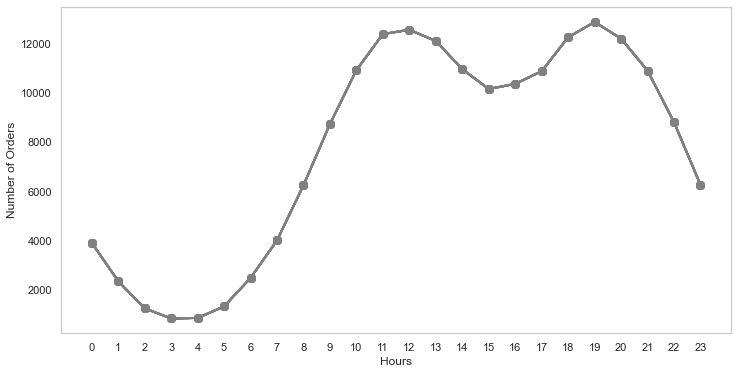

In [43]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count(), linewidth=2,markersize=8,marker='o',color='gray')
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

 Recomendation to advertise: 11am (11) or 7pm (19)

### What products are most often sold together?

In [44]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2021-04-21 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2021-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2021-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


If the Order ID values have the same ID then they must have been ordered together. Counting all the duplicate Order ID's. We will create a new dataframe df > We will filter all_data dataframe by Order ID .duplicated. This will check all the rows in the Order ID column and see which ones are duplciated and then we will pass in keep=False will keep all the occurances of duplicate 

In [45]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]  # creating new dataframe 
df.head(5)
# keep = False > notice below order ID 176560 is repeated couple of times because we set keep = False
# It keeps all the occurances of duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2021-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2021-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2021-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31


In [46]:
# create new column grouped > This column will have Google Phone and Wired Headphones  on the same line

df['Multiple_Products'] = df.groupby('Order ID')['Product'].transform(lambda x:',' .join(x))

# We groupby df based on order id and specifically looking for in the order id is the product column 
# and then we are transforming wherein it takes in lambda x (all the products under product id)
# and joining them by a comma
df.head(4)

C:\Users\91914\AppData\Local\Temp/ipykernel_12716/3498386781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Multiple_Products'] = df.groupby('Order ID')['Product'].transform(lambda x:',' .join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Multiple_Products
3,176560,Google Phone,1,600.00,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2021-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2021-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"


In [47]:
# Since the Order ID's are repeating 
df = df[['Order ID', 'Multiple_Products']].drop_duplicates()
# Get Order ID and Multiple Products column from df and drop the duplicates within them 
df.head(10)

,Order ID,Multiple_Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [48]:
# count the pairs that are occuring together most frequently 
# using couple of libraires for that

from itertools import combinations
from collections import Counter

count_2 = Counter()   # initiate counter > adds product sold in pairs (2)
count_3 = Counter()   # initiate counter > adds products sold in threes (3)

for row in df['Multiple_Products']:
    row_list = row.split(',')     # split rows by commas 
    count_2.update(Counter(combinations(row_list, 2)))   # 2 indicates the items that are sold in couples 
    count_3.update(Counter(combinations(row_list, 3)))   # we can use 3, 4,5  as well 
    
    

##### Group of Two Products 

In [49]:
grp_2 = pd.DataFrame.from_dict(count_2, orient='index').reset_index() # create df from count_2 COUNTER
group_of_2 = grp_2.rename(columns={'index':'Multiple products sold', 0:'count'})  # renaming the cols of df
two_sold = group_of_2.nlargest(15, ['count'])  #getting top 15 results

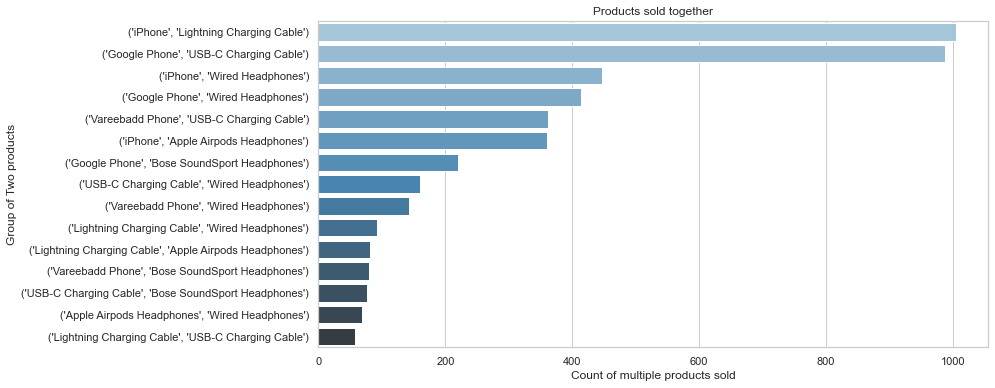

In [50]:
#figure 
# Grouped products in Two's

sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('whitegrid')

fig_5=sns.barplot(x="count", y="Multiple products sold", data=two_sold,
                 palette='Blues_d',orient='h') # Blues_d # flare
fig_5.set_title('Products sold together')
fig_5.set_ylabel('Group of Two products') 
fig_5.set_xlabel('Count of multiple products sold')
#fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=90)
plt.show()

##### Group of Three Products 
since some orders had 2, 3, 4 and even 5 products, for now we are getting group of 3

In [51]:
grp_3 = pd.DataFrame.from_dict(count_3, orient='index').reset_index() # create df from count_3 COUNTER
group_of_3 = grp_3.rename(columns={'index':'Multiple products sold', 0:'count'}) # renaming the cols of df
three_sold = group_of_3.nlargest(15, ['count'])

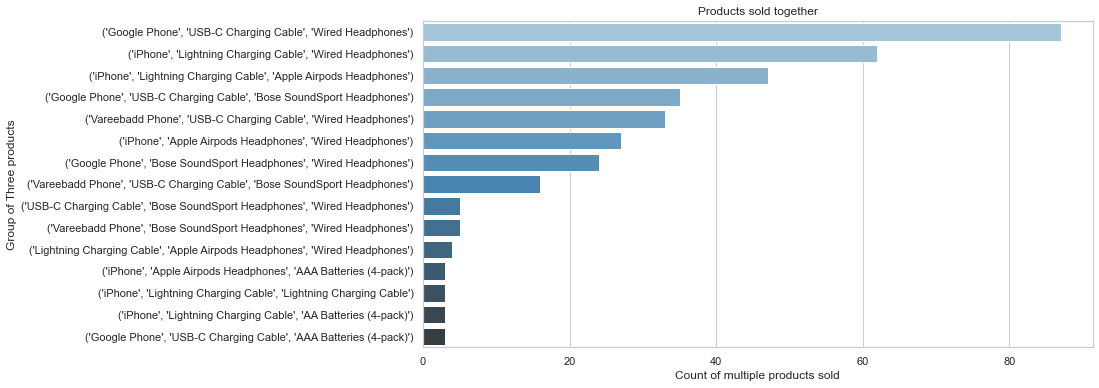

In [52]:
# Grouped products in Threes

sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('whitegrid')

fig_5=sns.barplot(x="count", y="Multiple products sold", data=three_sold,
                 palette='Blues_d',orient='h') # Blues_d # flare
fig_5.set_title('Products sold together')
fig_5.set_ylabel('Group of Three products') 
fig_5.set_xlabel('Count of multiple products sold')
#fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=90)
plt.show()

## What products sold the most ?

In [53]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2021-04-21 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2021-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2021-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2021-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [54]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

In [55]:
products_sold = pd.DataFrame(quantity_ordered).reset_index()
top_sold_products = products_sold.nlargest(15,['Quantity Ordered'])
top_sold_products

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


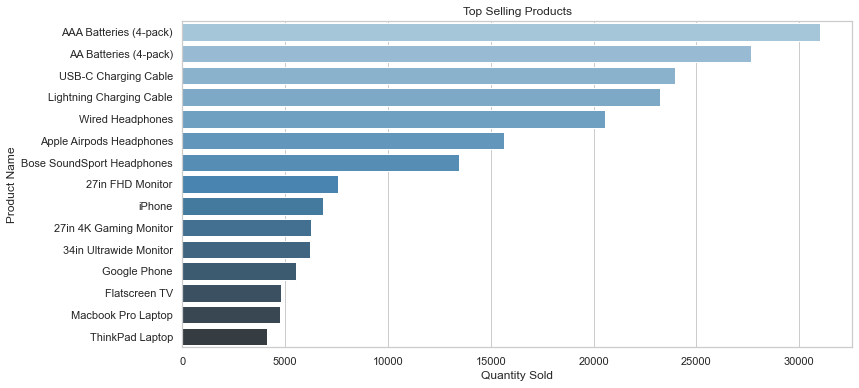

In [56]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('whitegrid')

fig_5=sns.barplot(x="Quantity Ordered", y="Product", data=top_sold_products,
                 palette='Blues_d', orient='h') # Blues_d # flare
fig_5.set_title('Top Selling Products')
fig_5.set_xlabel('Quantity Sold')
fig_5.set_ylabel('Product Name') 
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=45)
plt.show()